In [2]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.mlab as mlab
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_excel('./yeyeye.xlsx')
df.head(10)

,Year,Country,SP,Total_weight,Grownth_GDP,Inflation_rate,GDP_per_capital,Fiscal_Balance,Government_debt,Current_account_balance,Government_Effectiveness,Control_of_curruption
0,2006,CHN,1,0.953172,10.713288,1.649431,2099.229435,-0.76,25.38,8.424126,0.070475,-0.514581
1,2006,GBR,1,0.953172,2.584105,2.455662,44472.574235,-2.57,39.95,-2.814397,1.670994,1.792327
2,2006,BRA,0,0.247159,3.961989,4.183568,5886.463682,-3.57,55.48,1.181714,-0.320333,-0.109042
3,2006,RUS,1,0.861370,8.200068,9.668655,6920.189125,6.29,9.79,9.325459,-0.438045,-0.910895
4,2006,FRA,1,0.953172,2.449324,1.675124,36443.626306,-2.40,64.60,0.022183,1.632802,1.463727
5,2006,DEU,1,0.953172,3.816442,1.577428,36323.447742,-1.65,66.90,5.797964,1.650243,1.803052
6,2006,TUR,0,0.544827,6.947988,9.597242,8101.856924,1.76,44.26,-5.593854,0.120086,0.027346
7,2006,AUS,1,0.541896,2.726893,3.555288,36044.922811,1.78,9.97,-6.062233,1.711956,1.960568
8,2006,GRC,1,0.399212,5.652434,3.195944,24801.157784,-5.90,103.60,-10.821246,0.636948,0.363786
9,2006,HRV,1,0.156196,4.938357,3.189826,11695.944664,-3.10,38.80,-7.686457,0.571395,0.078597


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1335 non-null   int64  
 1   Country                   1335 non-null   object 
 2   SP                        1335 non-null   int64  
 3   Total_weight              1335 non-null   float64
 4   Grownth_GDP               1335 non-null   float64
 5   Inflation_rate            1335 non-null   float64
 6   GDP_per_capital           1335 non-null   float64
 7   Fiscal_Balance            1335 non-null   float64
 8   Government_debt           1335 non-null   float64
 9   Current_account_balance   1335 non-null   float64
 10  Government_Effectiveness  1335 non-null   float64
 11  Control_of_curruption     1335 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 125.3+ KB


In [4]:
df.isnull().sum()

Year                        0
Country                     0
SP                          0
Total_weight                0
Grownth_GDP                 0
Inflation_rate              0
GDP_per_capital             0
Fiscal_Balance              0
Government_debt             0
Current_account_balance     0
Government_Effectiveness    0
Control_of_curruption       0
dtype: int64

# Remove unnecessary variables


In [5]:
df.drop('Year', axis = 1, inplace = True)
df.columns

Index(['Country', 'SP', 'Total_weight', 'Grownth_GDP', 'Inflation_rate',
       'GDP_per_capital', 'Fiscal_Balance', 'Government_debt',
       'Current_account_balance', 'Government_Effectiveness',
       'Control_of_curruption'],
      dtype='object')

In [6]:
df.drop('Country', axis = 1, inplace = True)
df.columns

Index(['SP', 'Total_weight', 'Grownth_GDP', 'Inflation_rate',
       'GDP_per_capital', 'Fiscal_Balance', 'Government_debt',
       'Current_account_balance', 'Government_Effectiveness',
       'Control_of_curruption'],
      dtype='object')

In [7]:
df = pd.get_dummies(df)


# Divide the dataset into train and test sets

In [8]:
X = df.drop(columns='SP')

y= df["SP"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10000 )
 
X_train.shape

(1068, 9)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier ()



model.fit(X_train,y_train)

RandomForestClassifier()

# The variable that has the strongest impact on the classification

Text(0.5, 0, 'Random Forest Feature Importance')

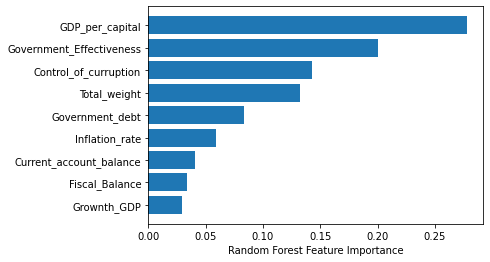

In [11]:
FI = model.feature_importances_.argsort()
plt.barh(X_train.columns[FI], model.feature_importances_[FI])
plt.xlabel("Random Forest Feature Importance")